## The data

Let's get started by importing libraries and loading the data


In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.DataFrame(
    {
        "value": [364, 232, 143, 357, 204, 131, 254, 158, 91, 196, 122, 74],
        "category": [
            "West",
            "West",
            "West",
            "East",
            "East",
            "East",
            "Central",
            "Central",
            "Central",
            "South",
            "South",
            "South",
        ],
        "sub_category": [
            "Consumer",
            "Corporate",
            "Home office",
            "Consumer",
            "Corporate",
            "Home office",
            "Consumer",
            "Corporate",
            "Home office",
            "Consumer",
            "Corporate",
            "Home office",
        ],
    }
)

cat_order = ["West", "East", "Central", "South"]
data["category"] = pd.Categorical(data["category"], categories=cat_order, ordered=True)
data = data.sort_values(["category", "value"], ascending=[True, False])

The dataset looks like this:


In [60]:
data

,value,category,sub_category
0,364,West,Consumer
1,232,West,Corporate
2,143,West,Home office
3,357,East,Consumer
4,204,East,Corporate
5,131,East,Home office
6,254,Central,Consumer
7,158,Central,Corporate
8,91,Central,Home office
9,196,South,Consumer


## Default grouped barplot

- `pivot_df` reshapes the data so that each row is a **category** and each column is a **sub-category**.
- `x` gives the base x-positions for the categories.
- The `for` loop goes through each **sub-category** and offsets its bars horizontally using `i * bar_width` so they appear grouped.
- Each `ax.bar()` call draws one set of bars (for one sub-category) at the correct shifted position.


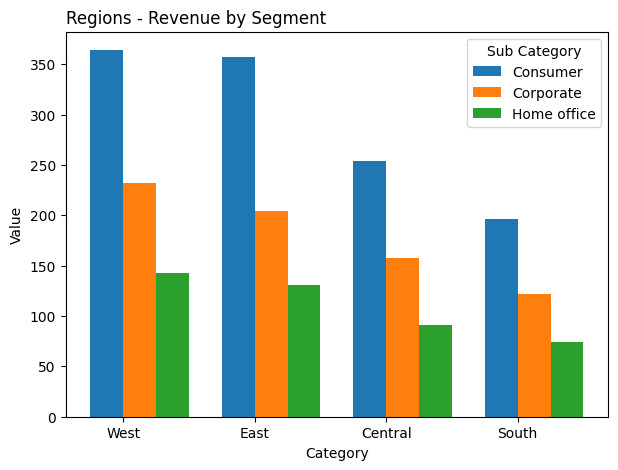

In [61]:
pivot_df = data.pivot(index="category", columns="sub_category", values="value")

fig, ax = plt.subplots(figsize=(7, 5))

bar_width = 0.25
x = np.arange(len(pivot_df.index))
for i, sub_cat in enumerate(pivot_df.columns):
    ax.bar(x + i * bar_width, pivot_df[sub_cat], width=bar_width, label=sub_cat)

ax.set_xlabel("Category")
ax.set_ylabel("Value")
ax.set_title("Regions - Revenue by Segment", loc="left")
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(pivot_df.index)
ax.legend(title="Sub Category")

plt.show()

## Total values in the background

This version adds **total bars** behind the grouped bars.

- It first calculates `totals` for each category (sum across sub-categories).
- `ax.bar(x, totals, ...)` draws **wide, light grey bars** as a background, showing the total per category.
- The `for` loop then overlays the **narrower, colored bars** for each sub-category, centered around each category position.

So while both use a loop to draw grouped bars, **this one also visualizes the total**, making it easier to compare individual sub-category values to the whole. The offset `(i - 0.5) * bar_width` ensures the grouped bars are centered over the total bar.


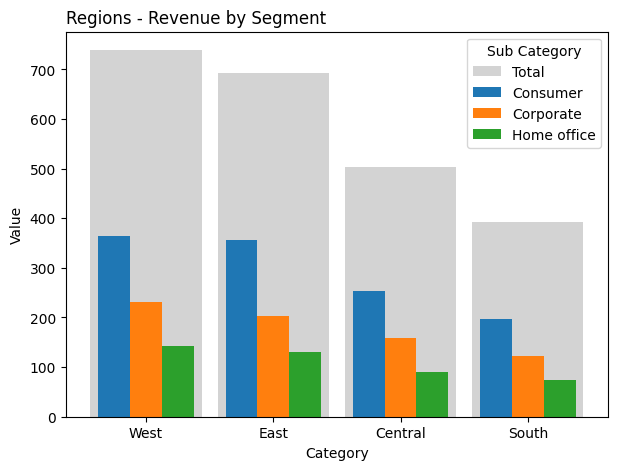

In [62]:
pivot_df = data.pivot(index="category", columns="sub_category", values="value")
totals = pivot_df.sum(axis=1)

fig, ax = plt.subplots(figsize=(7, 5))

bar_width = 0.25
x = np.arange(len(pivot_df.index))

ax.bar(x, totals, width=bar_width * 3.5, color="lightgrey", zorder=0, label="Total")

for i, sub_cat in enumerate(pivot_df.columns):
    ax.bar(
        x + (i - 1) * bar_width,
        pivot_df[sub_cat],
        width=bar_width,
        label=sub_cat,
        zorder=1,
    )

ax.set_xlabel("Category")
ax.set_ylabel("Value")
ax.set_title("Regions - Revenue by Segment", loc="left")
ax.set_xticks(x)
ax.set_xticklabels(pivot_df.index)
ax.legend(title="Sub Category")

fig.savefig(
    "../../static/graph/grouped-barplot-with-the-total-of-each-group-represented-as-a-grey-rectangle.png",
    dpi=100,
    bbox_inches="tight",
)
plt.show()

## Customization

Let's make it look nicer!


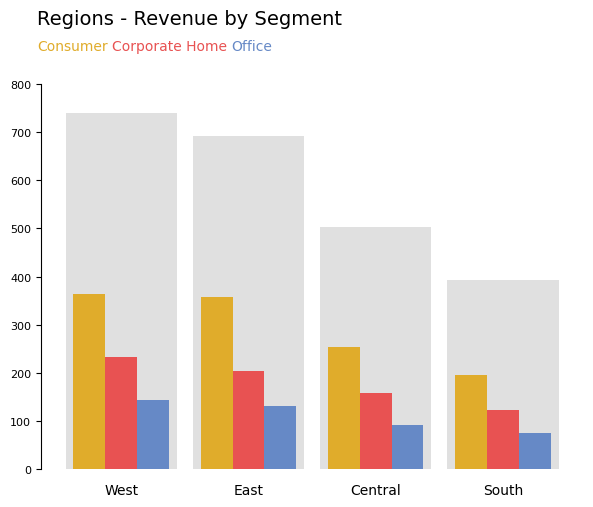

In [63]:
from highlight_text import fig_text

pivot_df = data.pivot(index="category", columns="sub_category", values="value")
totals = pivot_df.sum(axis=1)

fig, ax = plt.subplots(figsize=(7, 5))

bar_width = 0.25
x = np.arange(len(pivot_df.index))
colors = ["#E0AC2B", "#E85252", "#6689C6"]
x = np.arange(len(pivot_df.index))

ax.bar(x, totals, width=bar_width * 3.5, color="#E0E0E0", zorder=0)

for i, sub_cat in enumerate(pivot_df.columns):
    ax.bar(
        x + (i - 1) * bar_width,
        pivot_df[sub_cat],
        width=bar_width,
        zorder=1,
        color=colors[i],
    )

ax.set_xticks(x)
ax.set_xticklabels(pivot_df.index)
ax.set_yticks(list(range(0, 801, 100)))
ax.spines[["top", "right", "bottom"]].set_visible(False)
ax.tick_params(axis="x", size=0, pad=10)
ax.tick_params(axis="y", labelsize=8)

fig.text(x=0.12, y=1, s="Regions - Revenue by Segment", size=14)
fig_text(
    x=0.12,
    y=0.97,
    s="<Consumer> <Corporate Home> <Office>",
    highlight_textprops=[
        {"color": colors[0]},
        {"color": colors[1]},
        {"color": colors[2]},
    ],
)

fig.savefig(
    "../../static/graph/grouped-barplot-with-the-total-of-each-group-represented-as-a-grey-rectangle-2.png",
    dpi=100,
    bbox_inches="tight",
)
plt.show()


## Label values

The very last step in improving this graph is to add the values for each sub-category and each overall category. The key is to use `for` loops to dynamically add these labels.


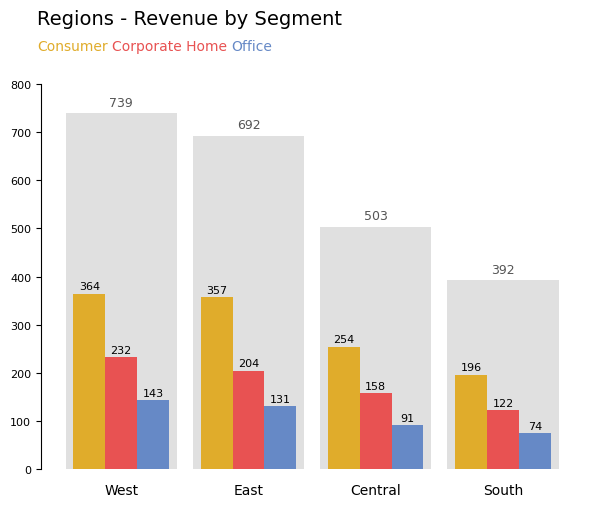

In [64]:
pivot_df = data.pivot(index="category", columns="sub_category", values="value")
totals = pivot_df.sum(axis=1)

fig, ax = plt.subplots(figsize=(7, 5))

bar_width = 0.25
x = np.arange(len(pivot_df.index))
colors = ["#E0AC2B", "#E85252", "#6689C6"]

ax.bar(x, totals, width=bar_width * 3.5, color="#E0E0E0", zorder=0)

for i, sub_cat in enumerate(pivot_df.columns):
    values = pivot_df[sub_cat]
    ax.bar(
        x + (i - 1) * bar_width,
        values,
        width=bar_width,
        zorder=1,
        color=colors[i],
    )
    for j, val in enumerate(values):
        ax.text(
            x[j] + (i - 1) * bar_width,
            val + 5,
            f"{val:.0f}",
            ha="center",
            va="bottom",
            fontsize=8,
        )

for i, total in enumerate(totals):
    ax.text(
        x[i],
        total + 10,
        f"{total:.0f}",
        ha="center",
        va="bottom",
        fontsize=9,
        color="#555555",
    )

ax.set_xticks(x)
ax.set_xticklabels(pivot_df.index)
ax.set_yticks(list(range(0, 801, 100)))
ax.spines[["top", "right", "bottom"]].set_visible(False)
ax.tick_params(axis="x", size=0, pad=10)
ax.tick_params(axis="y", labelsize=8)

fig.text(x=0.12, y=1, s="Regions - Revenue by Segment", size=14)
fig_text(
    x=0.12,
    y=0.97,
    s="<Consumer> <Corporate Home> <Office>",
    highlight_textprops=[
        {"color": colors[0]},
        {"color": colors[1]},
        {"color": colors[2]},
    ],
)

fig.savefig(
    "../../static/graph/grouped-barplot-with-the-total-of-each-group-represented-as-a-grey-rectangle-3.png",
    dpi=100,
    bbox_inches="tight",
)
plt.show()

## Going further

- Learn more about [barplots](https://python-graph-gallery.com/barplot/)
- How to create a [stacked barplot](https://python-graph-gallery.com/12-stacked-barplot-with-matplotlib/)
- How to create a [percent stacked barplot](https://python-graph-gallery.com/13-percent-stacked-barplot/)
